# ¿Cuál es un mejor plan?

Trabajamos como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Realizamos un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Son datos de 500 clientes de Megaline conformado por: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron, todo en el 2018. 

Nuestro trabajo fue analizar, el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Tabla de contenidos del proyecto
* [1 Incialización.](#Capítulo_1)
    * [1.1 Cargar los datos](#Sección_1_1)
* [2 Exploración de bases de datos](#Capítulo_2)
    * [2.1 Planes](#Sección_2_1)
        * [2.1.1 Corregir los datos](#Sección_2_1_1)
        * [2.1.2 Enriquecer los Datos](#Sección_2_1_2)
    * [2.2 Usuarios](#Sección_2_2)
        * [2.2.1 Corregir los datos](#Sección_2_2_1)
        * [2.2.2 Enriquecer los Datos](#Sección_2_2_2)        
    * [2.3 Llamadas](#Sección_2_3)
        * [2.2.1 Corregir los datos](#Sección_2_3_1)
        * [2.2.2 Enriquecer los Datos](#Sección_2_3_2)
    * [2.4 Mensajes](#Sección_2_4)
        * [2.2.1 Corregir los datos](#Sección_2_4_1)
        * [2.2.2 Enriquecer los Datos](#Sección_2_4_2)        
    * [2.5 Internet](#Sección_2_5)
        * [2.2.1 Corregir los datos](#Sección_2_5_1)
        * [2.2.2 Enriquecer los Datos](#Sección_2_5_2)
    * [2.6 Estudiar las condiciones de los planes](#Sección_2_6)
    * [2.7 Unir bases de datos](#Sección_2_7)
* [3 Estudiando el comportamiento del usuario](#Capítulo_3)
    * [3.1 LLamadas](#Sección_3_1)
    * [3.2 Mensajes](#Sección_3_2)
    * [3.3 Internet](#Sección_3_3)
    * [3.4 Patrones de Consumo](#Sección_3_4)
    * [3.5 Prueba de hipotesis nula](#Sección_3_5)
* [4 Conclusión general](#Capítulo_4)

## Inicialización <a class="anchor" id="Capítulo_1"></a>

Importamos las librearias que van a ser de utilidad para el análisis.

In [1]:
# Se Cargan las librerías
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import stats as st

### Cargar los datos <a class="anchor" id="Sección_1_1"></a>

Hacemos el código que implica los archivos que vamos a exportar para realizar nuestro análisis.

In [2]:
# Se cargan los archivos de datos de los diferentes DataFrames

try:
    llamadas = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    mensajes = pd.read_csv('/datasets/megaline_messages.csv')
    planes = pd.read_csv('/datasets/megaline_plans.csv')
    usuarios = pd.read_csv('/datasets/megaline_users.csv')
except:
    llamadas = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    mensajes = pd.read_csv('megaline_messages.csv')
    planes = pd.read_csv('megaline_plans.csv')
    usuarios = pd.read_csv('megaline_users.csv')


## Exploración de bases de datos  <a class="anchor" id="Capítulo_2"></a>

A continuación vamos a exportar cada una de las tablas antes escritas para hacer los cambios necesarios dentro de las mismas y así poder llevar a cabo nuestro análisis de una manera más eficiente.

## Planes <a class="anchor" id="Sección_2_1"></a>

In [3]:
# Imprimimos la información general sobre el DataFrame de los planes
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para los planes
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El valor de los mb por mes está mal, por lo que será el único dato a cambiar.

### Corregir los datos <a class="anchor" id="Sección_2_1_1"></a>

En la siguiente celda colocamos el valor correcto de mb por mes.

In [5]:
planes.loc[1,"mb_per_month_included"] = 13312 #cambiamos el valor de mb por mes incluidos 
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,13312,3000,70,7,0.01,0.01,ultimate


### Enriquecer los datos <a class="anchor" id="Sección_2_1_2"></a>

Esta tabla en general no necesita otro cambio, por lo que la dejamos así.

## Usuarios <a class="anchor" id="Sección_2_2"></a>

In [6]:
# Imprimimos la información general sobre el DataFrame de los usuarios
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprimimos una muestra de los datos para los usuarios
usuarios.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


En general los datos estan bien, solo se cambiara el Dtype de las columnas `reg_date` y `churn_date`. Los valores ausentes en la columna `churn_date`, se quedan igual debido al significado que tienen de que las personas siguen con su plan activo.

### Corregir datos  <a class="anchor" id="Sección_2_2_1"></a>

Solo apicaremos el cambio de tipo de objeto a fecha a las columnas que antes mencionamos.

In [8]:
# cambiar valores de fechas
usuarios['reg_date']= pd.to_datetime(usuarios['reg_date'], format='%Y-%m-%d')

In [9]:
# cambiar valores de fechas
usuarios['churn_date']= pd.to_datetime(usuarios['churn_date'], format='%Y-%m-%d')

### Enriquecer datos <a class="anchor" id="Sección_2_2_2"></a>

Esta tabla en general no necesita otro cambio, por lo que la dejamos así.

## Llamadas <a class="anchor" id="Sección_2_3"></a>

In [10]:
# Imprimos la información general sobre el DataFrame de las llamadas
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprimos una muestra de datos para llamadas
llamadas.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Cambiaremos el tipo de datos en la columna `call_date` por el de fecha y analizaremos si no hay datos con ceros.

### Corregir datos <a class="anchor" id="Sección_2_3_1"></a>

Corregimos el detalle antes mencionado 

In [12]:
llamadas['call_date']= pd.to_datetime(llamadas['call_date'], format='%Y-%m-%d')

Analizamos si hya datos con ceros en la duración de las llamadas

In [13]:
a = len(llamadas[llamadas['duration']==0])
porcentaje = a / len(llamadas)
print(f' Las llamadas perdidas representan el:{porcentaje :.2%}')

 Las llamadas perdidas representan el:19.48%


Dado que queremos reviar costos, las llamada de cero segundos no representan ningún costo, por lo que las quitaremos de nuestra tabla, además de que redondearemos la duración de las llamadas una unidad hacia arriba.

In [14]:
llamadas = llamadas[llamadas['duration']!=0]

In [15]:
llamadas['duration'] = llamadas['duration'].apply(math.ceil)
llamadas # para observar que se hizo el cambio

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


### Enriquecer datos <a class="anchor" id="Sección_2_3_2"></a>

Vamos a agregar la columna de mes.

In [16]:
llamadas['mes'] = llamadas["call_date"].dt.month
print(llamadas)

              id  user_id  call_date  duration  mes
0        1000_93     1000 2018-12-27         9   12
1       1000_145     1000 2018-12-27        14   12
2       1000_247     1000 2018-12-27        15   12
3       1000_309     1000 2018-12-28         6   12
4       1000_380     1000 2018-12-30         5   12
...          ...      ...        ...       ...  ...
137730  1499_199     1499 2018-11-21         9   11
137731  1499_200     1499 2018-10-20        11   10
137732  1499_201     1499 2018-09-21         9    9
137733  1499_202     1499 2018-10-10         1   10
137734  1499_203     1499 2018-12-29        14   12

[110901 rows x 5 columns]


## Mensajes <a class="anchor" id="Sección_2_4"></a>

In [17]:
# Imprime la información general sobre el DataFrame de los mensajes
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprimos una muestra de datos para los mensajes
mensajes.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Cambiaremos el tipo de datos en la columna `message_date` por el de fecha.

### Corregir datos  <a class="anchor" id="Sección_2_4_1"></a>

Hacemos el cambio antes mencionado:

In [19]:
mensajes['message_date']= pd.to_datetime(mensajes['message_date'], format='%Y-%m-%d')

### Enriquecer datos <a class="anchor" id="Sección_2_4_2"></a>

Vamos a agregar este dataframe la columna de mes.

In [20]:
mensajes['mes'] = mensajes["message_date"].dt.month
print(mensajes)

             id  user_id message_date  mes
0      1000_125     1000   2018-12-27   12
1      1000_160     1000   2018-12-31   12
2      1000_223     1000   2018-12-31   12
3      1000_251     1000   2018-12-27   12
4      1000_255     1000   2018-12-26   12
...         ...      ...          ...  ...
76046  1497_526     1497   2018-12-24   12
76047  1497_536     1497   2018-12-24   12
76048  1497_547     1497   2018-12-31   12
76049  1497_558     1497   2018-12-24   12
76050  1497_613     1497   2018-12-23   12

[76051 rows x 4 columns]


## Internet <a class="anchor" id="Sección_2_5"></a>

In [21]:
# Imprimos la información general sobre el DataFrame del internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Cambiaremos el tipo de datos en la columna `session_date` por el de fecha y analizaremos si no hay datos con ceros.

### Corregir datos <a class="anchor" id="Sección_2_5_1"></a>

Hacemos los cambios antes mencionados:

In [23]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Analizamos si no hay sesiones con ceros mb.

In [24]:
a = len(internet[internet['mb_used']==0])
porcentaje = a / len(internet)
print(f' Las llamadas perdidas represnetan el:{porcentaje :.2%}')

 Las llamadas perdidas represnetan el:13.11%


Dado que queremos analizar costos, quitaremos aquellas sesiones donde el uso de mb, haya sido cero.

In [25]:
internet = internet[internet['mb_used']!=0]
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


### Enriquecer datos <a class="anchor" id="Sección_2_5_2"></a>

Agregaremos la columna del mes.

In [26]:
internet['mes'] = internet["session_date"].dt.month
print(internet)

              id  user_id session_date  mb_used  mes
0        1000_13     1000   2018-12-29    89.86   12
2       1000_379     1000   2018-12-28   660.40   12
3       1000_413     1000   2018-12-26   270.99   12
4       1000_442     1000   2018-12-27   880.22   12
5         1001_0     1001   2018-08-24   284.68    8
...          ...      ...          ...      ...  ...
104819  1499_214     1499   2018-10-18   261.13   10
104820  1499_215     1499   2018-10-20   218.06   10
104821  1499_216     1499   2018-12-30   304.72   12
104822  1499_217     1499   2018-09-22   292.75    9
104824  1499_219     1499   2018-12-24   758.31   12

[91078 rows x 5 columns]


## Estudiar las condiciones de los planes <a class="anchor" id="Sección_2_6"></a>

Es sumamente importante entender cómo funcionan los planes, cómo se cobra a los usuarios con base en su plan de suscripción. Así que imprimimos la información del plan para ver una vez más sus condiciones.

In [27]:
# Imprimos las condiciones del plan y para asegurarnos que los planes sean claros te resulten claros
planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,13312,3000,70,7,0.01,0.01,ultimate


## Unir bases de datos <a class="anchor" id="Sección_2_7"></a>

De las tablas de llamadas,mensajes,internet, las acomodaremos de modo que podamos ver el gasto del usuario en cada uno de estos rubros por mes.

In [28]:
# Se calcula el número de llamadas hechas por cada usuario por mes.
cantidad_de_llamadas = llamadas.pivot_table(index = ('user_id','mes'),
            values = 'duration',aggfunc = 'count').reset_index().rename(columns={'duration':'llamadas'})
print(cantidad_de_llamadas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   2256 non-null   int64
 1   mes       2256 non-null   int64
 2   llamadas  2256 non-null   int64
dtypes: int64(3)
memory usage: 53.0 KB
None


In [29]:
# Se calcula la cantidad de minutos que usó cada usuario por mes.
minutos_por_llamadas = llamadas.pivot_table(index = ('user_id','mes'),
        values = 'duration',aggfunc = 'sum').reset_index().rename(columns={'duration':'min_x_llamada'})
                                            
print(minutos_por_llamadas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        2256 non-null   int64
 1   mes            2256 non-null   int64
 2   min_x_llamada  2256 non-null   int64
dtypes: int64(3)
memory usage: 53.0 KB
None


In [30]:
# Se calcula el número de mensajes enviados por cada usuario por mes.
mensajes_por_mes = mensajes.pivot_table(index = ('user_id', 'mes'),
                    values = 'id',aggfunc = 'count').reset_index().rename(columns={'id':'mensajes'})
print(mensajes_por_mes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   1806 non-null   int64
 1   mes       1806 non-null   int64
 2   mensajes  1806 non-null   int64
dtypes: int64(3)
memory usage: 42.5 KB
None


In [31]:
# Se calcula el volumen del tráfico de internet usado por cada usuario por mes.
internet_por_mes = internet.pivot_table(index = ('user_id','mes'),
                      values = 'mb_used',aggfunc = 'sum').reset_index()
print(internet_por_mes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2277 non-null   int64  
 1   mes      2277 non-null   int64  
 2   mb_used  2277 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 53.5 KB
None


In [32]:
#cambiaremos los datos a gigas y los redondearemos a la siguiente unidad para arriba, para cumplir con el creiterio de cobro
internet_por_mes['mb_used'] = internet_por_mes['mb_used']/1024
internet_por_mes['mb_used'] = internet_por_mes['mb_used'].apply(math.ceil)
internet_por_mes= internet_por_mes.rename(columns={'mb_used':'gigas_x_mes'})

Combinamos las nuevas tablas en una sola para analizar en una fila, todo lo que consumió un usario en una fila única.

In [33]:
# Combinamos los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
telefonia = internet_por_mes.merge(cantidad_de_llamadas,how='outer').merge(minutos_por_llamadas,how='outer').merge(mensajes_por_mes,how='outer')
print(telefonia.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   mes            2293 non-null   int64  
 2   gigas_x_mes    2277 non-null   float64
 3   llamadas       2256 non-null   float64
 4   min_x_llamada  2256 non-null   float64
 5   mensajes       1806 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB
None


Cambiamos el tipo de las columna que tengas números flotantes a enteros. También reemplzamos los vacios por ceros.

In [34]:
telefonia.fillna(0,inplace=True)
telefonia["gigas_x_mes"] = telefonia["gigas_x_mes"].astype("int64")
telefonia["llamadas"] = telefonia["llamadas"].astype("int64")
telefonia["min_x_llamada"] = telefonia["min_x_llamada"].astype("int64")
telefonia["mensajes"] = telefonia["mensajes"].astype("int64")

In [35]:
# Añadimos la información del plan
telefonia_completa = telefonia.merge(usuarios)
telefonia_completa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2293 non-null   int64         
 1   mes            2293 non-null   int64         
 2   gigas_x_mes    2293 non-null   int64         
 3   llamadas       2293 non-null   int64         
 4   min_x_llamada  2293 non-null   int64         
 5   mensajes       2293 non-null   int64         
 6   first_name     2293 non-null   object        
 7   last_name      2293 non-null   object        
 8   age            2293 non-null   int64         
 9   city           2293 non-null   object        
 10  reg_date       2293 non-null   datetime64[ns]
 11  plan           2293 non-null   object        
 12  churn_date     158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 250.8+ KB


In [36]:
telefonia_completa.head(5) # mostramos unas cuantas filas del dataframe completo

,user_id,mes,gigas_x_mes,llamadas,min_x_llamada,mensajes,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,2,16,124,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8,7,22,182,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9,14,38,315,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10,22,47,393,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11,19,49,426,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT


Creamos una función que nos va dar en una nueva columna el gasto total que tiene cada usarios de acuerdo a lo que uso en ese mes dentro del paquete y lo que uso de más.

In [37]:
# Calcula el ingreso mensual para cada usuario
def calculo_de_gasto(row): 
    gigas = row['gigas_x_mes']
    mensajes = row['mensajes']
    min_x_llamadas = row['min_x_llamada']
    plan = row['plan']
    
    if plan == 'ultimate':
        if gigas > 30:
            a = (gigas-30) * 7
        else:
            a = 0
                
        if mensajes > 1000:
            b = (mensajes-1000) * 0.01
        else:
            b = 0
                
        if min_x_llamadas > 3000:
            c = (min_x_llamadas-3000) * 0.01
        else:
            c = 0
        
        return a+b+c+70
        
    else: #si el plan es surf entones pasa lo siguiete
        if gigas > 15:
            d = (gigas-15) * 10
        else:
            d = 0
                
        if mensajes > 50:
            e = (mensajes-50) * 0.03
        else:
            e = 0
                
        if min_x_llamadas > 500:
            f = (min_x_llamadas-500) * 0.03
        else:
            f = 0
                
        return d+e+f+20  

In [38]:
telefonia_completa['gasto_mensual'] = telefonia_completa.apply(calculo_de_gasto, axis=1) #aplicamos la función

In [39]:
telefonia_completa['gasto_mensual'].isna().sum() #corroboramos que no hay ningún dato vacío.

0

## Estudiando el comportamiento del usuario <a class="anchor" id="Capítulo_3"></a>

Calculamos algunas estadísticas descriptivas para los datos agregados y fusionados que nos puedan ser útiles y que muestren un panorama general captado por los datos. 

Dibujamos gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar los planes y decidir cuál es más rentable, por lo tanto las estadísticas y gráficas fueron calculadas por plan.


### Llamadas <a class="anchor" id="Sección_3_1"></a>

<Axes: title={'center': 'Promedio de minutos por llamada'}, xlabel='mes', ylabel='Promedio'>

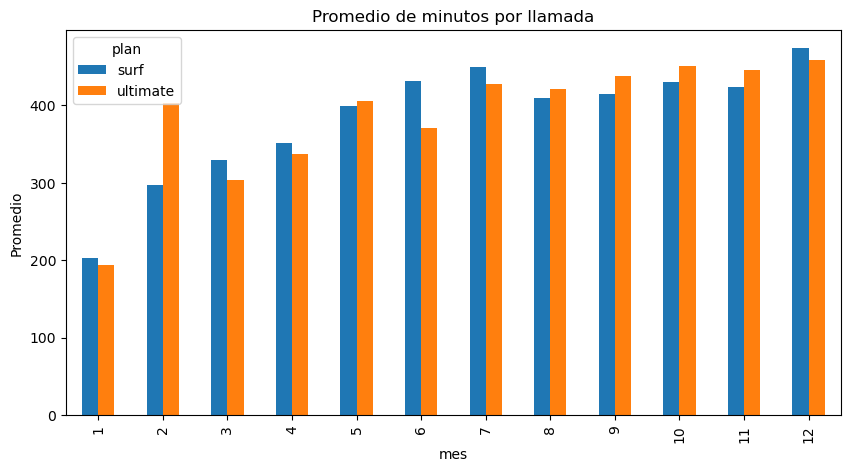

In [40]:
# Comparamos la duración promedio de llamadas por cada plan por cada mes. 
grafica_barra = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='min_x_llamada',aggfunc='mean')
grafica_barra.plot(kind='bar',title='Promedio de minutos por llamada',ylabel='Promedio',figsize=(10,5))


array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

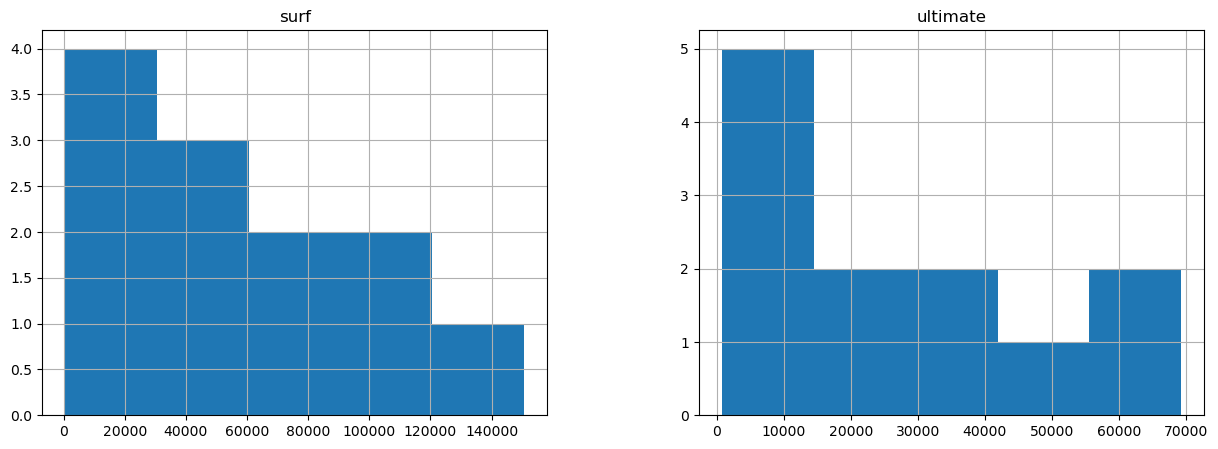

In [41]:
# Comparamos la duración total de llamadas por cada plan por cada mes.
grafica_hist = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='min_x_llamada',aggfunc='sum')
grafica_hist.hist(bins=5,figsize=(15,5))

Calculamos la media y la desviación estándar de la duración de la llamadas para concluir si los usuarios de diferentes planes muestran comportamientos distintos para sus llamadas.

In [42]:
# Calculamos la media y desviación estandar de la duración mensual de llamadas.
telefonia_completa.pivot_table(index='mes',columns=['plan'],values='min_x_llamada',aggfunc=['mean','std']).reset_index()

mes        mean                     std            
plan            surf    ultimate        surf    ultimate
0      1  203.000000  193.500000  125.865007  128.733575
1      2  297.000000  403.142857  228.531179  277.289517
2      3  330.000000  304.250000  189.233622  248.967732
3      4  351.540000  336.857143  225.536567  186.785783
4      5  399.584416  406.241379  244.446763  209.382537
5      6  431.298969  370.957447  213.524304  206.163924
6      7  449.983471  427.067797  246.992105  269.375898
7      8  410.111111  421.436620  233.119381  231.614997
8      9  414.226804  437.511628  215.860971  238.894254
9     10  429.729958  450.735849  228.645280  232.941861
10    11  423.325088  445.196850  227.171789  246.156907
11    12  473.836478  459.099338  252.248923  250.007567

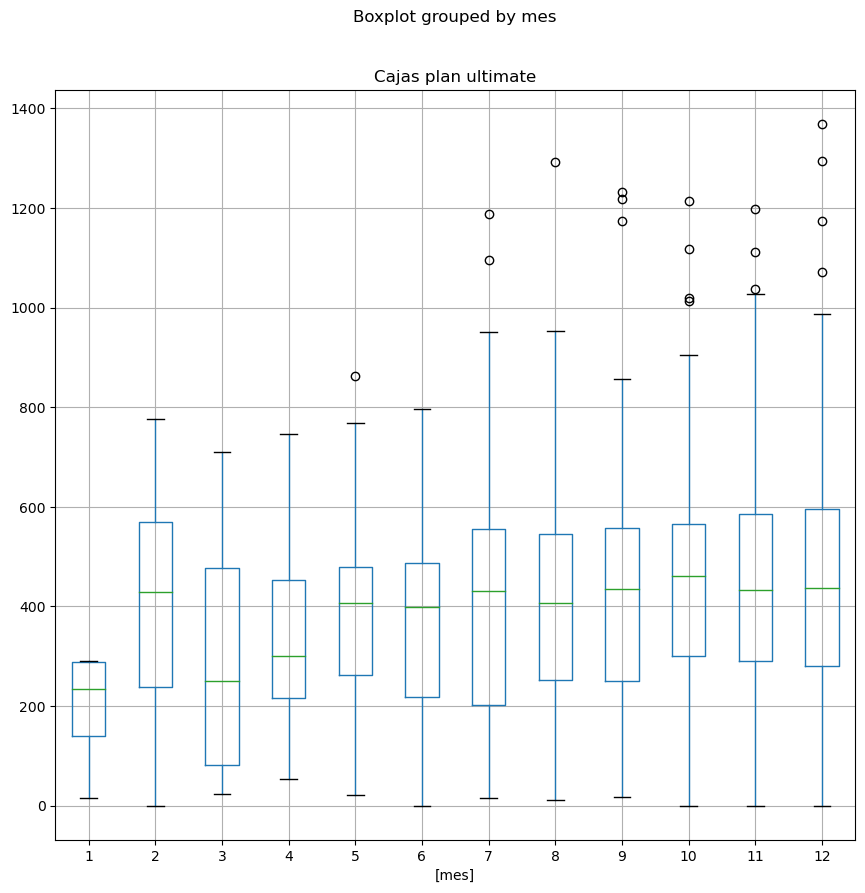

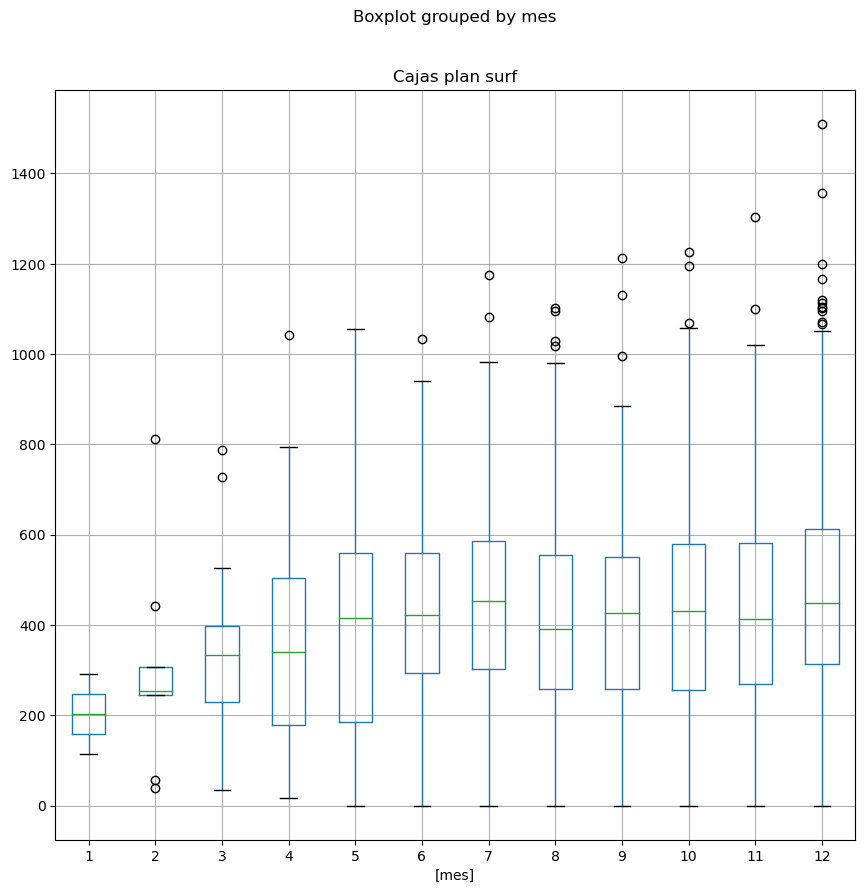

In [43]:
# Trazamos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.

grafica_box_ultimate = telefonia_completa[telefonia_completa['plan'] == 'ultimate']
grafica_box_ultimate[['mes','min_x_llamada']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan ultimate")
plt.show()

grafica_box_surf = telefonia_completa[telefonia_completa['plan'] == 'surf']
grafica_box_surf[['mes','min_x_llamada']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan surf")
plt.show()

En general podemos observar que la cantidad de llamadas promedio aumentan conforme nos acercamos al mes 12.

Entre más minutos se consumen por llamada, menos son la cantidad de usarios que lo hacen.

En el paquete Surf la duración de las llamdas es mayor que en el plan Ultimate

El plan Ultimate tienen mas meses con un promedio de  minutos por llamada mayor a los 400 min y no solo eso, también sus datos son un poco más dispersos que los del plan surf, en otras palbras, tiene meses con mayor desviación estandar el plan ultimate  que el plan surf.

### Mensajes <a class="anchor" id="Sección_3_2"></a>

<Axes: title={'center': 'Promedio de Mensajes'}, xlabel='mes', ylabel='Promedio'>

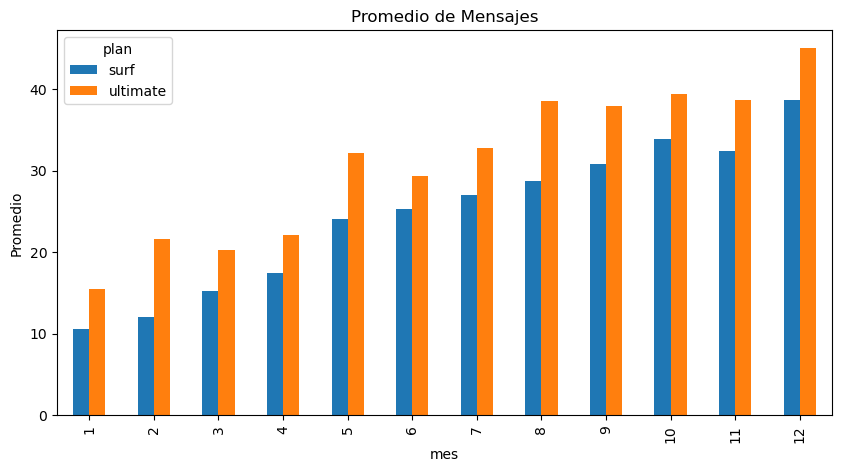

In [44]:
# Comprara el número de mensajes promedio que tienden a enviar cada mes los usuarios de cada plan
grafica_barra = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='mensajes',aggfunc='mean')
grafica_barra.plot(kind='bar',title='Promedio de Mensajes',ylabel='Promedio',figsize=(10,5))

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

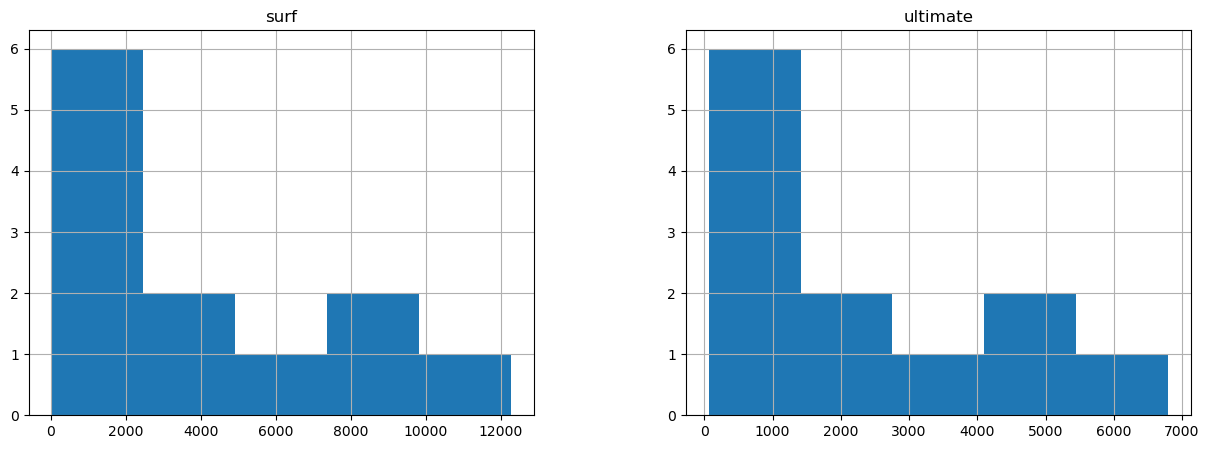

In [45]:
# Compara la cantidad de mensajes consumido por usuarios por plan
grafica_hist = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='mensajes',aggfunc='sum')
grafica_hist.hist(bins=5,figsize=(15,5))

In [46]:
# Calculamos la media y desviación estandar de los mensajes mensuales.
telefonia_completa.pivot_table(index='mes',columns=['plan'],values='mensajes',aggfunc=['mean','std']).reset_index()

mes       mean                   std           
plan           surf   ultimate       surf   ultimate
0      1  10.500000  15.500000  14.849242  17.710637
1      2  12.000000  21.571429  19.646883  21.869744
2      3  15.260870  20.250000  18.616262  25.580977
3      4  17.400000  22.047619  22.396246  23.326972
4      5  24.012987  32.103448  29.106652  36.018195
5      6  25.298969  29.340426  30.247646  29.285162
6      7  27.033058  32.830508  30.395979  30.991741
7      8  28.777778  38.478873  32.086064  34.588544
8      9  30.762887  37.895349  31.683268  32.417871
9     10  33.839662  39.443396  35.713663  34.944331
10    11  32.385159  38.606299  32.639608  35.109389
11    12  38.600629  45.006623  38.185843  39.362672

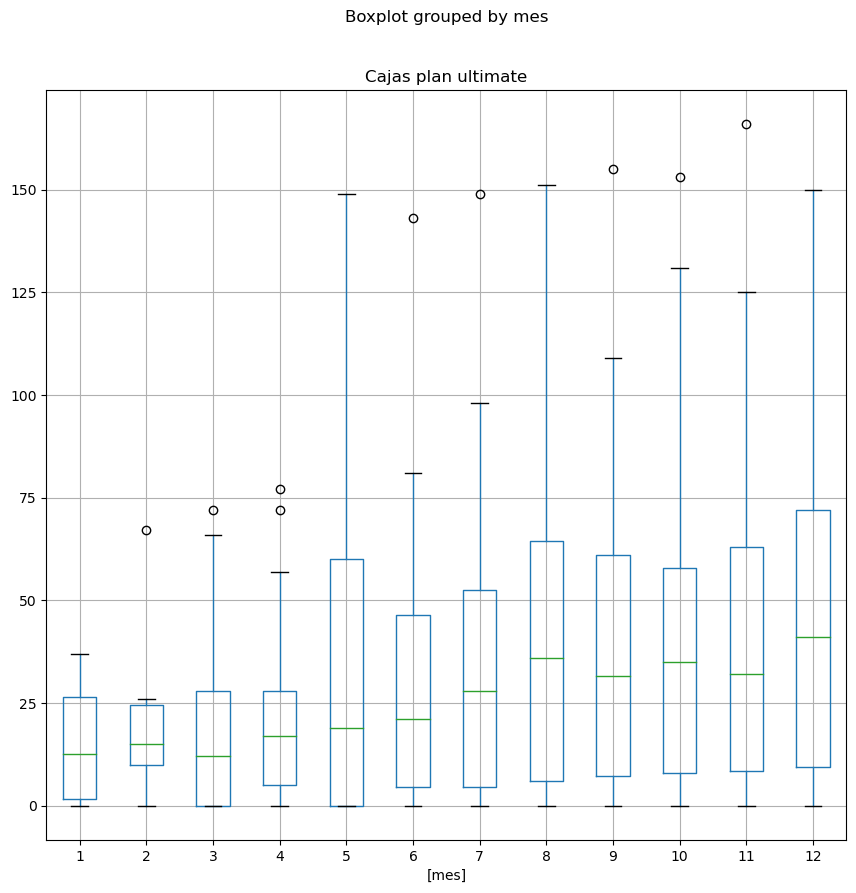

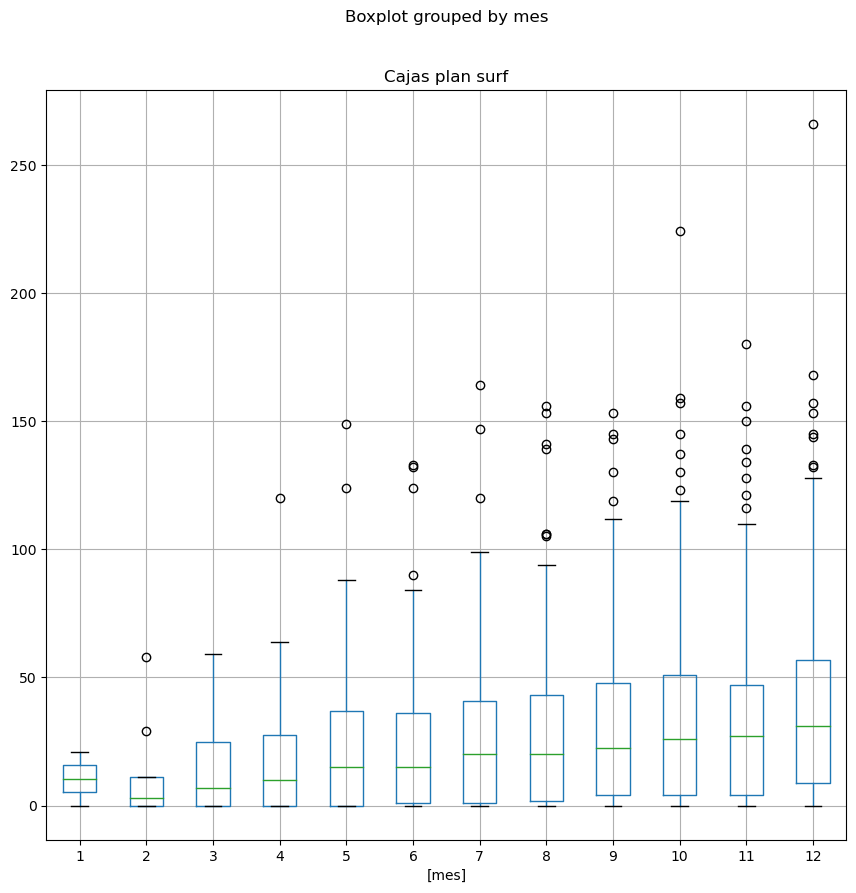

In [47]:
# Trazamos un diagrama de caja para visualizar la distribución de la cantidad mensual de los mensajes.

grafica_box_ultimate = telefonia_completa[telefonia_completa['plan'] == 'ultimate']
grafica_box_ultimate[['mes','mensajes']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan ultimate")
plt.show()

grafica_box_surf = telefonia_completa[telefonia_completa['plan'] == 'surf']
grafica_box_surf[['mes','mensajes']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan surf")
plt.show()

En general podemos observar que la cantidad de mensajes promedio aumentan conforme nos acercamos al mes 12 y que es mayor en el plan Ultimate.

Entre más mensajes, menos son la cantidad de usarios que lo hacen.

En el paquete Surf la mensajes en total enviados son más que en el plan Ultimate.

El plan Ultimate en casi todos los meses hay un promedio de mensajes enviados mayor  y no solo eso, también sus datos son más dispersos que los del plan surf, en otras palbras, tiene meses con mayor desviación estandar el plan ultimate  que el plan surf.

### Internet <a class="anchor" id="Sección_3_3"></a>

<Axes: title={'center': 'Promedio de uso de gigas'}, xlabel='mes', ylabel='Promedio'>

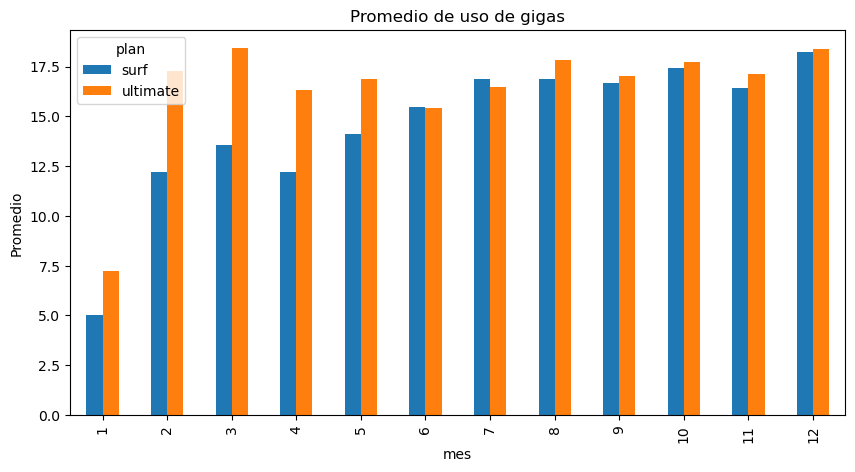

In [48]:
# Comprara el número de gigas promedio que tienden a enviar cada mes los usuarios de cada plan
grafica_barra = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='gigas_x_mes',aggfunc='mean')
grafica_barra.plot(kind='bar',title='Promedio de uso de gigas',ylabel='Promedio',figsize=(10,5))

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

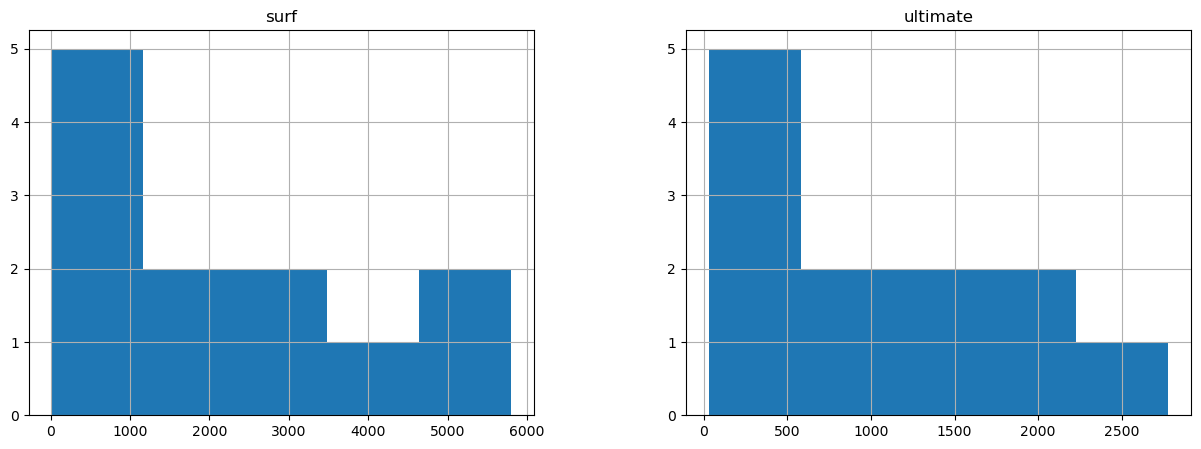

In [49]:
# Compara la cantidad de gigas consumido por usuarios por plan
grafica_hist = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='gigas_x_mes',aggfunc='sum')
grafica_hist.hist(bins=5,figsize=(15,5))

In [50]:
# Calculamos la media y desviación estandar de los gigas mensuales.
telefonia_completa.pivot_table(index='mes',columns=['plan'],values='gigas_x_mes',aggfunc=['mean','std']).reset_index()

mes       mean                  std           
plan           surf   ultimate      surf   ultimate
0      1   5.000000   7.250000  4.242641   3.862210
1      2  12.222222  17.285714  6.437736   6.156684
2      3  13.565217  18.416667  7.999012  11.774073
3      4  12.220000  16.333333  7.497728   9.264628
4      5  14.116883  16.862069  7.627813   7.361697
5      6  15.484536  15.425532  6.910308   8.298100
6      7  16.876033  16.491525  7.840674   8.015874
7      8  16.882716  17.845070  8.451091   7.618864
8      9  16.690722  17.011628  7.017167   6.874495
9     10  17.409283  17.716981  7.792679   7.389510
10    11  16.431095  17.118110  7.389711   7.375005
11    12  18.238994  18.397351  8.319305   7.670793

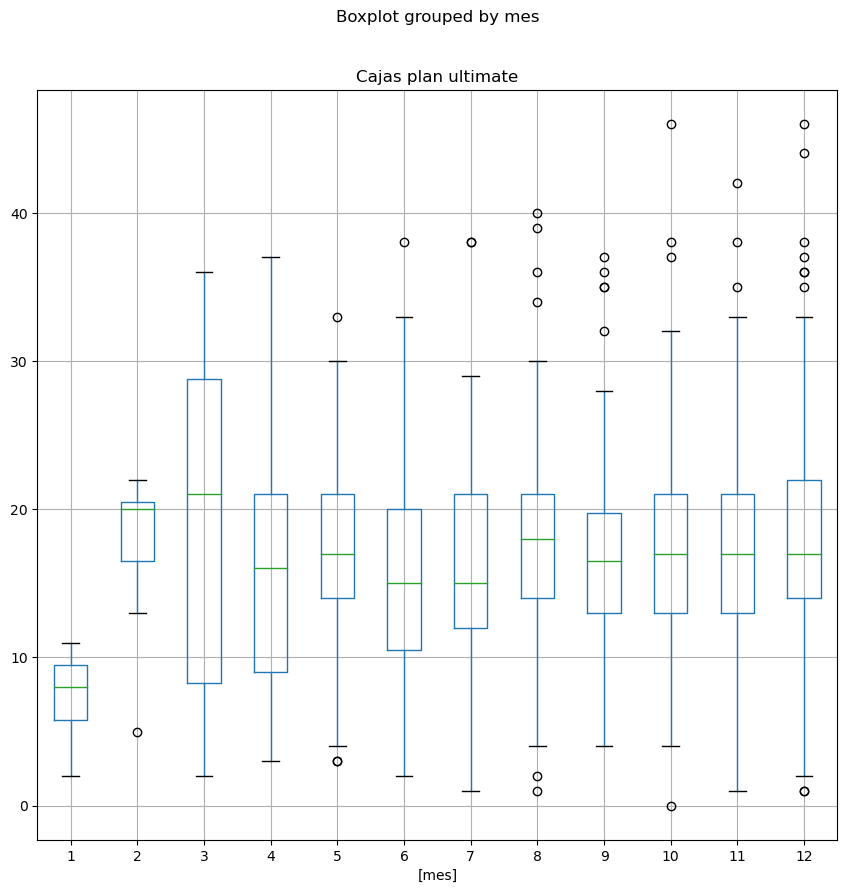

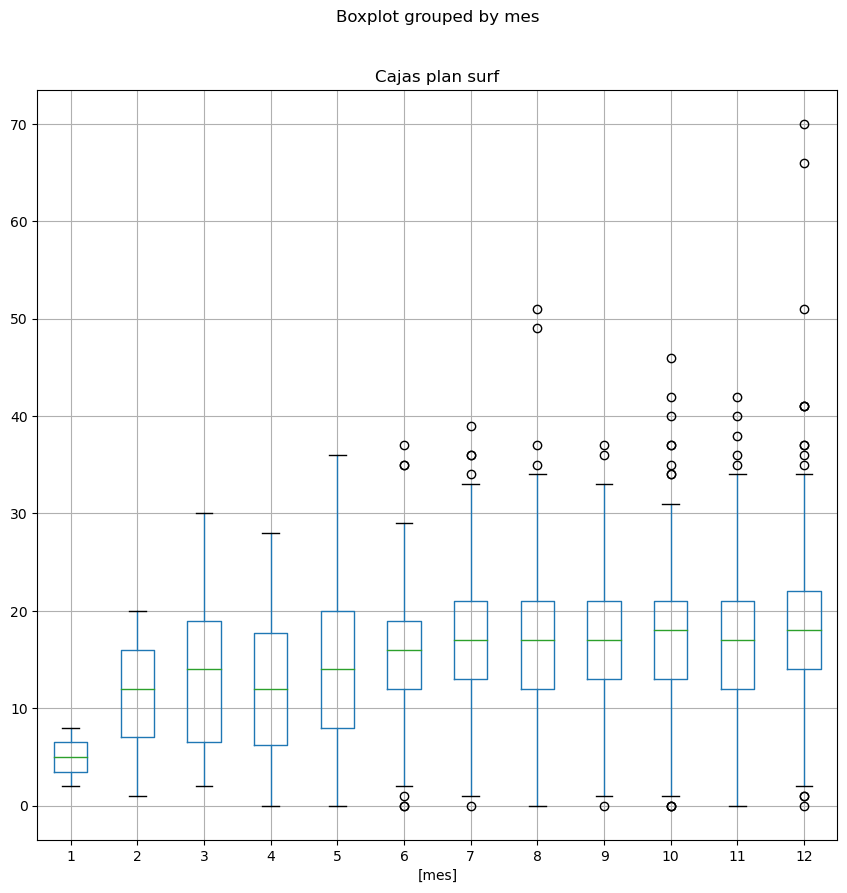

In [51]:
# Trazamos un diagrama de caja para visualizar la distribución el uso mensual de gigas.

grafica_box_ultimate = telefonia_completa[telefonia_completa['plan'] == 'ultimate']
grafica_box_ultimate[['mes','gigas_x_mes']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan ultimate")
plt.show()

grafica_box_surf = telefonia_completa[telefonia_completa['plan'] == 'surf']
grafica_box_surf[['mes','gigas_x_mes']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan surf")
plt.show()

En general podemos observar que la cantidad de gigas promedio aumentan conforme nos acercamos al mes 12 y que es ligeramente mayor en el plan Ultimate.

Entre más gigas, menos son la cantidad de usarios que lo hacen.

En el paquete Surf la gigas en total usados son más que en el plan ultimate.

El plan ultimate en casi en una mayoria de meses hay un promedio de gigas usados mayor y no solo eso, también sus datos son más dispersos que los del plan surf, en otras palbras, tiene meses con mayor desviación estandar el plan ultimate  que el plan surf.

## Patrones de Consumo <a class="anchor" id="Sección_3_4"></a>

<Axes: title={'center': 'Promedio de gasto'}, xlabel='mes', ylabel='Promedio'>

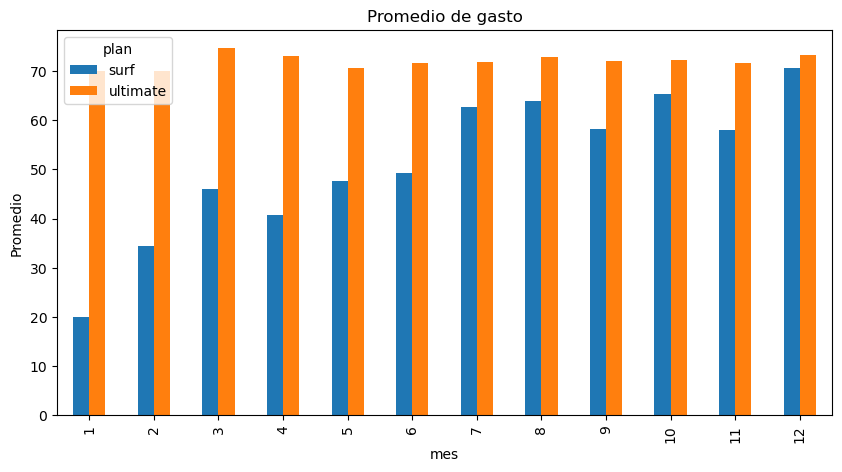

In [52]:
# Comprara el gasto promedio de los usuarios de cada plan.
grafica_barra = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='gasto_mensual',aggfunc='mean')
grafica_barra.plot(kind='bar',title='Promedio de gasto',ylabel='Promedio',figsize=(10,5))

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

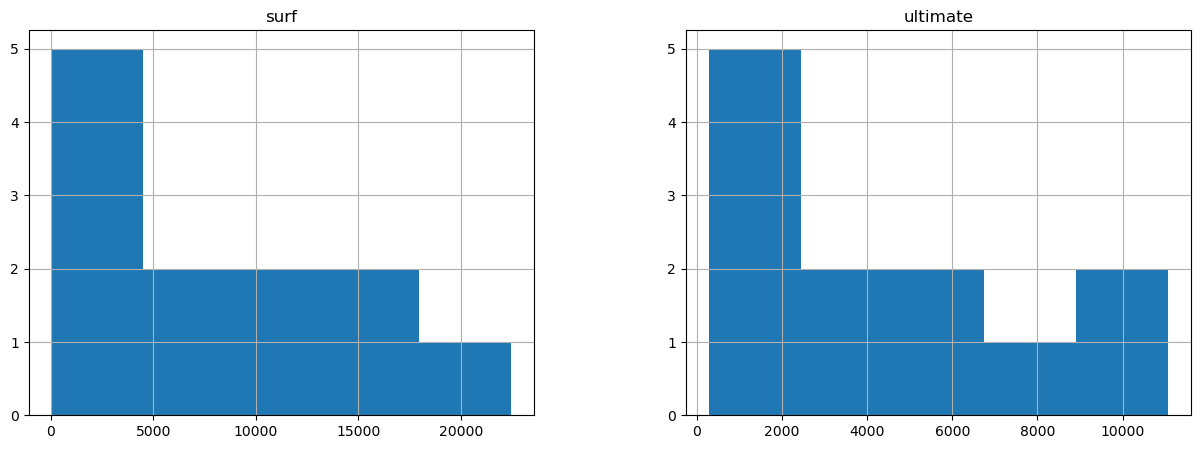

In [53]:
# Compara el gasto total mensual por usuarios por plan.
grafica_hist = telefonia_completa.pivot_table(index='mes',columns=['plan'],values='gasto_mensual',aggfunc='sum')
grafica_hist.hist(bins=5,figsize=(15,5))

In [54]:
# Calculamos la media y desviación estandar del gasto mensual.
telefonia_completa.pivot_table(index='mes',columns=['plan'],values='gasto_mensual',aggfunc=['mean','std']).reset_index()

mes       mean                   std           
plan           surf   ultimate       surf   ultimate
0      1  20.000000  70.000000   0.000000   0.000000
1      2  34.396667  70.000000  20.694833   0.000000
2      3  45.941304  74.666667  38.884747  12.062966
3      4  40.710600  73.000000  34.625979  10.972693
4      5  47.628182  70.724138  44.356962   3.899602
5      6  49.276289  71.638298  44.597243   8.661322
6      7  62.674050  71.898305  54.253004  10.221166
7      8  63.931173  72.859155  59.895700  12.442204
8      9  58.271495  72.034884  47.546240   8.714353
9     10  65.421224  72.311321  56.553007  13.023322
10    11  58.004276  71.708661  49.941788   9.729770
11    12  70.557044  73.291391  67.855809  14.589763

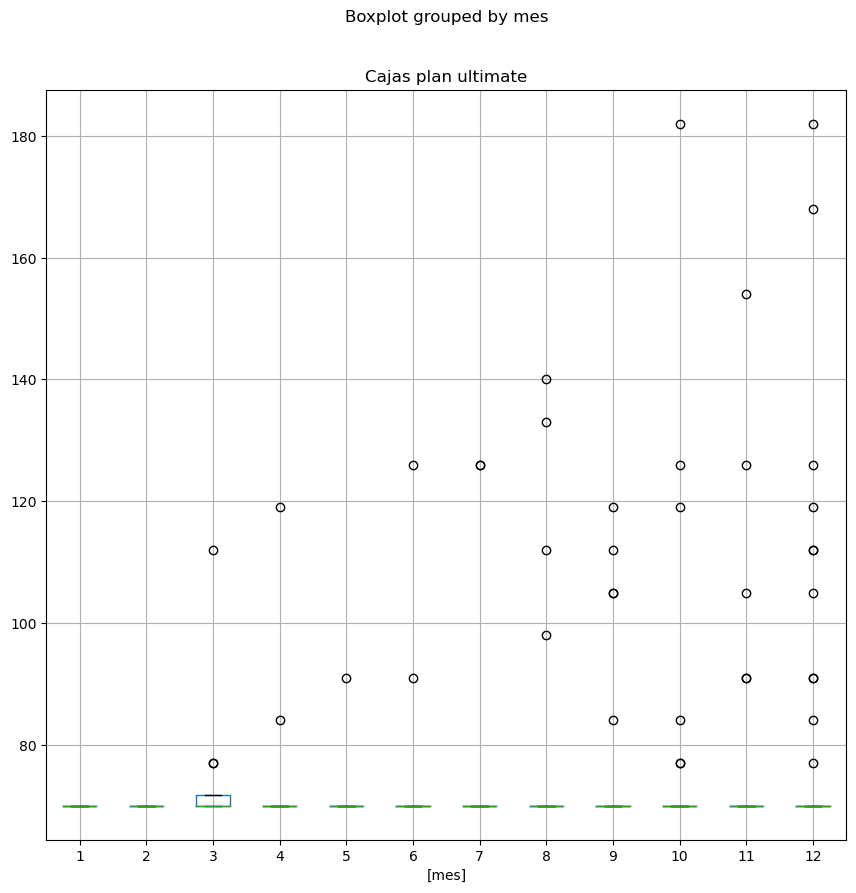

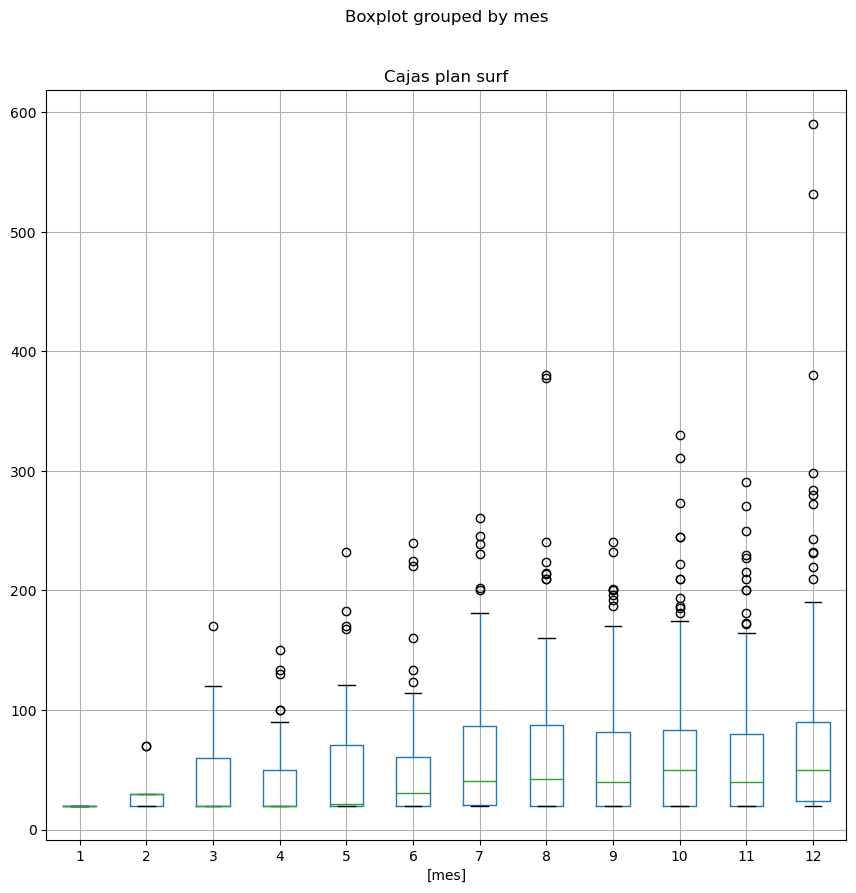

In [55]:
# Trazamos un diagrama de caja para visualizar la distribución el gasto mensual por plan.

grafica_box_ultimate = telefonia_completa[telefonia_completa['plan'] == 'ultimate']
grafica_box_ultimate[['mes','gasto_mensual']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan ultimate")
plt.show()

grafica_box_surf = telefonia_completa[telefonia_completa['plan'] == 'surf']
grafica_box_surf[['mes','gasto_mensual']].boxplot(by='mes',figsize=(10,10))
plt.title("Cajas plan surf")
plt.show()

En general podemos observar que la cantidad de gasto promedio aumentan conforme nos acercamos al mes 12 y que es notablemente mayor en el plan Ultimate.

Entre más gasten, menos son la cantidad de usarios que lo hacen.

En el paquete Surf el gasto total es más que en el plan ultimate.

Se puede observar una muy pequeña desviación estandar en el plan ultimate, de modo que podemos decir que las personas que decidieron pagar 70 dólares su paquete los contiene bien y es raro quien termina pagando de más, pero en el caso del plan surf, la desviación estanar es muy grande, por lo que podemos decir que las personas que compran ese paquete al tener menos de todo, tienden a pasar del límite y no solo eso si no también sobrepasarse del costo original de 20 dólares, teniendo más personas que se pasan de los 200 dólares, mientras que en el plan ultimate apenas si llegan a los 200 dólares. 

### Prueba de hipotesis nula <a class="anchor" id="Sección_3_5"></a>

Nuestra hipotesis nula será que las medias tanto de la base de datos de los usarios que tienen el plan surf y el ultimate son el mismo y por ello decimos que el gasto entre ambos planes es similar. Pondremos que la varianza es diferente, ya que en los resutados anteriores, hemos visto que la desviación estandar es diferente y por ende también lo es la varianza. Elegimos alpha = 0.05

In [56]:
# Prueba de la hipótesis nula

muestra_1 = telefonia_completa.loc[telefonia_completa['plan'] == 'ultimate',['gasto_mensual']]

muestra_2 = telefonia_completa.loc[telefonia_completa['plan'] == 'surf',['gasto_mensual']]

alpha = 0.05 # el nivel de significancia estadística crítica

resultado = st.ttest_ind(muestra_1, muestra_2, equal_var = False)

print('p-value: ', resultado.pvalue)

if resultado.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  [3.17039055e-15]
Rechazamos la hipótesis nula


Dado el resultado anterior de lo pequeño que fue el valor p, entonces no podemos asumir que las muestras tienen la misma media y es algo que ya veniamos viendo desde la sección pasada.

Probaremos que el gasto proemdio de los usuarios del área de NY-NJ es igual al de los usuarios de otras regiones, igual usaremos un valor de alpha igual a 0.05.

In [57]:
# Prueba las hipótesis
ny = telefonia_completa[telefonia_completa['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
sin_ny = telefonia_completa[telefonia_completa['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

muestra_1 = ny['gasto_mensual']
muestra_2 = sin_ny['gasto_mensual']

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

resultado = st.ttest_ind(muestra_1, muestra_2, equal_var = False)

print('p-value: ', resultado.pvalue)

if resultado.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.0335256158853001
Rechazamos la hipótesis nula


El valor p, solo por muy poco, quedó debajo de alpha, pero aun así es suficiente para saber que el promedio de gasto entre la ciudad de NY-NJ y las demás ciudades es significativamente diferente.

## Conclusión general <a class="anchor" id="Capítulo_4"></a>

En los tablas que contenian la cantidad de llamadas, de minutos por llamadas, mensajes y uso de datos de internet, se les cambio ciertas columnas de tipo objeto a fecha y se les agregó una columna donde solo estuviera marcado el mes.

Se procedió a realizar los redondeos necesarios en los minutos por llamadas y uso de megas de tal manera que se puidera obtener el gasto correcto de los mismos en los pasos siguientes.

Se unieron todas las tablas de modo que se supiera que uso cada usuario, en cada uno de los rubros del paquete, a que paquete pertencía y se creó una función para poder calcular el gasto que tuvo cada usario.

A partir de esto se pudo analizar la información y obtener lo siguiente:

    - Situación general para las llamadas, mensajes, uso de datos y gasto
    
        - Entre más avanzaba el año, más uso promedio había.
        - Conforme más uso de las llamadas, mensajes y datos menos usarios había haciendolo.
        - El uso promedio de llamadas, mensajes y datos y el gasto también, 
          es mayor en el paquete ultimate que en el surf.
        - El gasto total de llamadas, mensajes, datos y el gasto son mayores en el plan surf.
        - Las desviaciones estandar en llamadas, mensajes, datos y el gasto es mayor en el plan surf.

Dada la hipotesis nula de que los planes surf y ultimate tenian un media similar, se encontró que tienen una variación realmente significativa.

La información anterior nos ayudo a ver que el plan que se debería darle mayor publiciad es el surf, ya que aunque es un paquete de costo pequeño (20 dólares), los usarios realmente terminan consumiendo más allá de su plan y de una manera desmedida, habieno quien sobrepase hasta los 200 dólares, tal como lo pudimos observar en las boxplot del gasto por plan.